# **Student Performance (Multiple Linear Regression) from KAGGLE**

# **1. Chargement, nettoyage et manipulation des données avec Pandas**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 38.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Student_Performance.csv to Student_Performance.csv


In [3]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
original_dimension = df.shape
original_dimension

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
print(df.isnull().sum() * 100 / len(df))

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64


In [8]:
duplicated = df.duplicated()
print(f"Nombre des doublons = {duplicated.sum()}")

Nombre des doublons = 127


In [9]:
students = df.drop_duplicates()
nouvelle_dimension = students.shape
print(f"Nouvelle dimension : {nouvelle_dimension}")

Nouvelle dimension : (9873, 6)


In [10]:

if original_dimension == nouvelle_dimension:
    print("Il n'y a pas de doublons")
else:
    print(f"Il y a doublons")

Il y a doublons


In [11]:
students.shape

(9873, 6)

In [12]:
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [13]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


**Données catégoriques**

In [14]:
students['Extracurricular Activities'] = students['Extracurricular Activities'].astype('category')
students.dtypes

<ipython-input-14-78478aef56e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Extracurricular Activities'] = students['Extracurricular Activities'].astype('category')


,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,category
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


**Encoding des données catégoriques**

In [19]:
students['Extracurricular Activities'] = students['Extracurricular Activities'].map({'Yes':1, 'No':0})

<ipython-input-19-f2a4256682d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Extracurricular Activities'] = students['Extracurricular Activities'].map({'Yes':1, 'No':0})


In [20]:
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


**Données numériques(int, float)**

In [21]:
variables_numeriques = students.select_dtypes(include=['number']).columns
variables_numeriques

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

**Scaling des données numériques**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(students[variables_numeriques])
students[variables_numeriques] = X_scaled

<ipython-input-22-a93815ea7501>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students[variables_numeriques] = X_scaled


In [23]:
students.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775566,1.706168,1,1.454025,-1.249715,1.862979
1,-0.383205,0.724912,0,-1.491315,-0.900925,0.509348
2,1.161822,-1.064438,1,0.275889,-0.900925,-0.531907
3,0.003052,-1.006717,1,-0.902247,-0.900925,-1.000471
4,0.775566,0.320865,0,0.864957,0.145444,0.561411


# **2. Détection des valeurs aberrantes et des points influents**

In [24]:
variables_numeriques

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

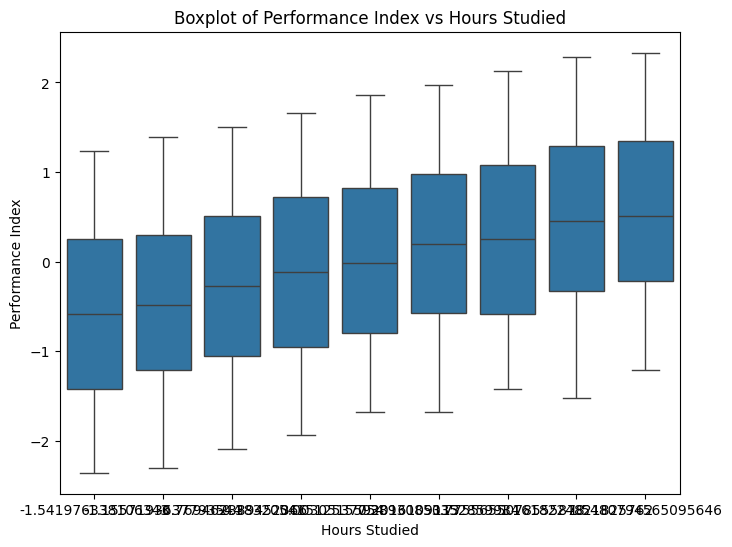

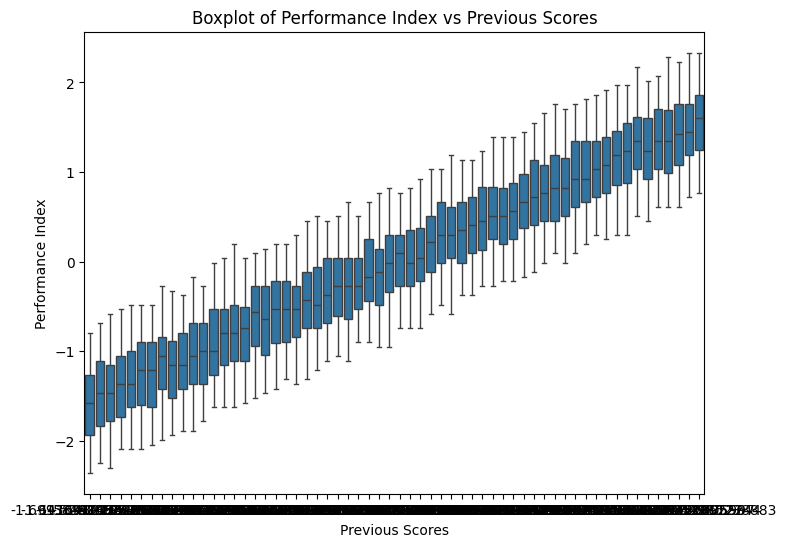

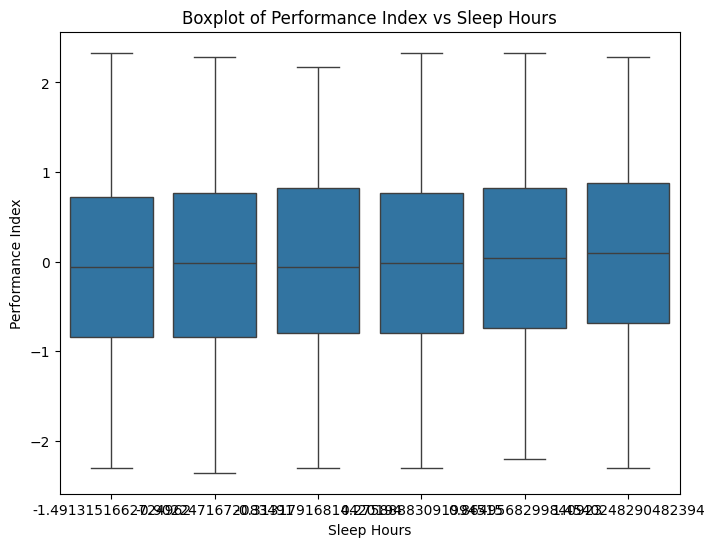

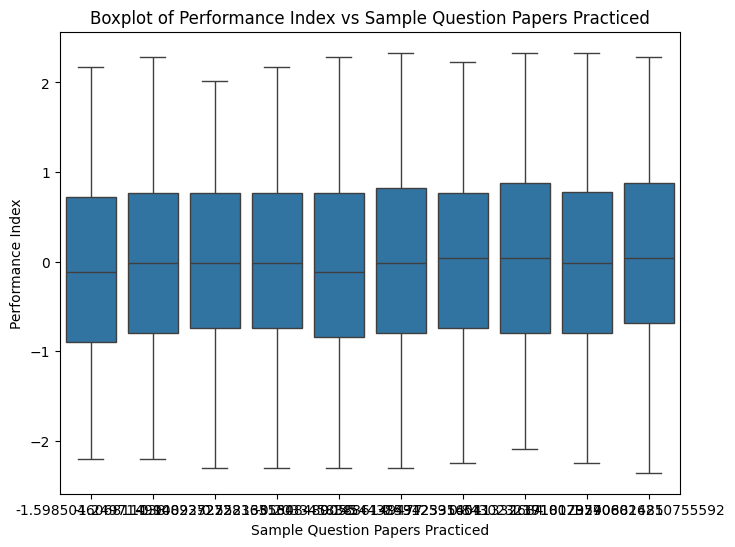

In [51]:
# Créer des boxplot pour les variables numeriques par rapport à la variable cible Performance Index
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Performance Index', data=students)
    plt.title(f'Boxplot of Performance Index vs {col}')
    plt.xlabel(col)
    plt.ylabel('Performance Index')
    plt.show()

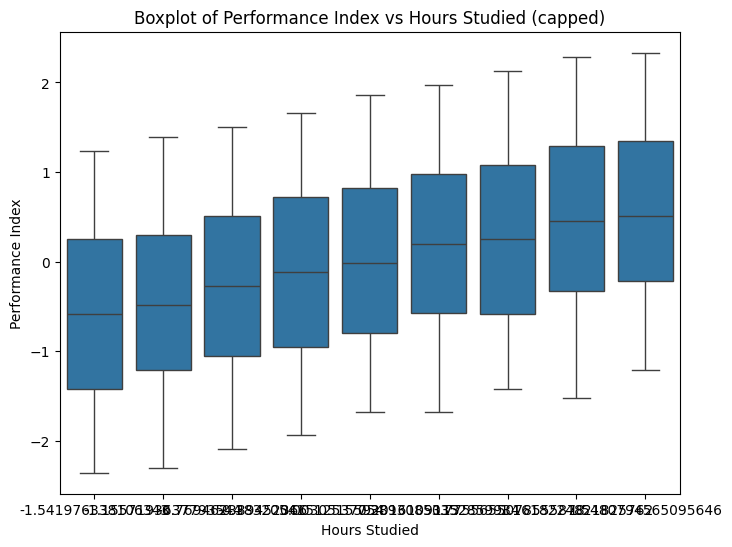

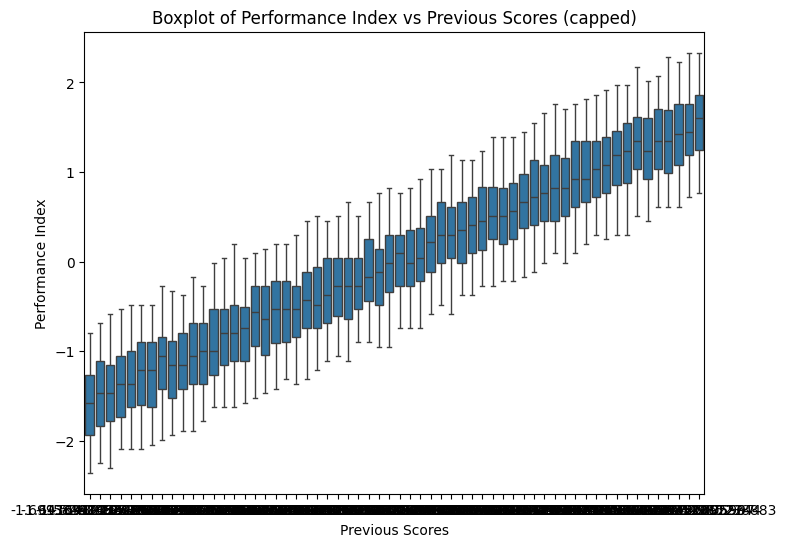

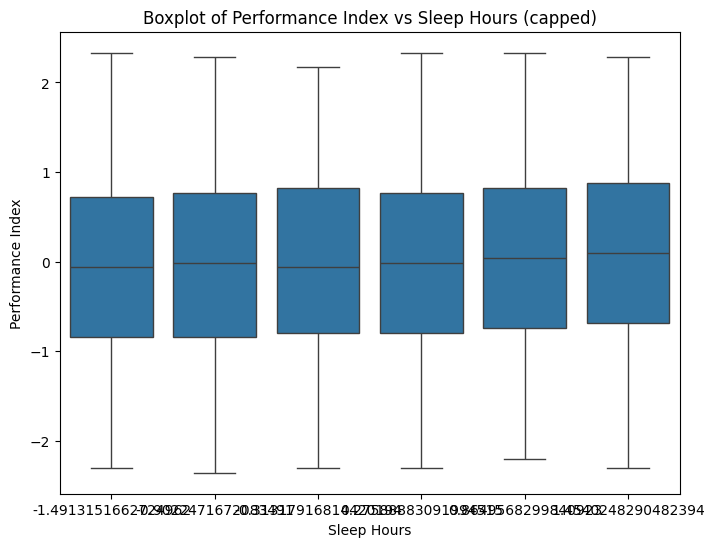

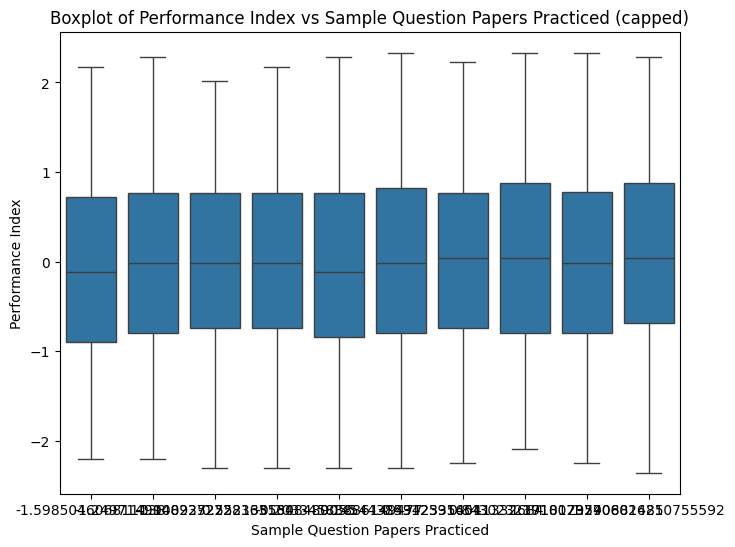

In [50]:
# Appliquer des techniques de capping pour limiter l’impact des valeurs aberrantes.

def cap_outliers(df, column, method='iqr', threshold=1.5):
    """
    Caps outliers in a DataFrame column using IQR or standard deviation method.

    Args:
        df: The input DataFrame.
        column: The name of the column to cap outliers.
        method: The method to use for outlier detection ('iqr' or 'std'). Default is 'iqr'.
        threshold: The multiplier for IQR or standard deviation to define outlier boundaries. Default is 1.5.

    Returns:
        A new DataFrame with capped outliers.
    """

    df_capped = df.copy()  # Create a copy to avoid modifying the original DataFrame

    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
    elif method == 'std':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'std'.")

    df_capped[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df_capped[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df_capped


# Example usage (replace 'your_column' with the actual column name):
for col in numerical_cols:
    students = cap_outliers(students, col, method='iqr') # or method='std'


# Now you can visualize the data again to see the capped outliers.
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Performance Index', data=students)
    plt.title(f'Boxplot of Performance Index vs {col} (capped)')
    plt.xlabel(col)
    plt.ylabel('Performance Index')
    plt.show()

# **3. Analyse de régression avancée**

**Diviser la dataset**

In [27]:
x = students.drop('Performance Index', axis=1)

y = students['Performance Index']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8591,0.003052,0.089981,0,-1.491315,-0.203346
9120,-1.155719,-0.718113,1,0.275889,-1.249715
4112,-1.541976,-1.179880,0,-1.491315,-1.598505
811,-0.769462,-0.660392,1,-0.313179,-1.249715
6848,-0.769462,0.609470,0,0.864957,1.191813
...,...,...,...,...,...
5771,-1.155719,-1.353043,0,-0.313179,0.145444
5221,1.548079,-0.544950,1,-1.491315,-0.552136
5424,0.003052,1.475285,1,-0.902247,0.494234
860,-1.541976,-1.295322,0,1.454025,-1.598505


In [30]:
y_train

,Performance Index
8591,0.040783
9120,-1.052534
4112,-1.885538
811,-0.740158
6848,0.196971
...,...
5771,-1.729350
5221,0.040783
5424,1.342352
860,-1.833475


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
predictions = model.predict(X_test)

In [37]:
predictions

array([-0.45485328,  1.30514648,  0.30449081, ...,  1.13849663,
        1.61551254, -1.0067534 ])

In [36]:
y_test

,Performance Index
6099,-0.427781
106,1.082038
9265,0.353160
4707,-1.677287
2155,1.082038
...,...
8732,-1.885538
3112,-0.844283
5297,1.134101
6116,1.706791


In [38]:
# 5/ b) Calculer l’Erreur Quadratique Moyenne (MSE),

from sklearn.metrics import mean_squared_error

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.01167126561552025


In [39]:
# 5/ c) Calculer le Coefficient de Détermination (R²).

from sklearn.metrics import r2_score

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, predictions)

print(f"Coefficient de détermination (R²): {r2}")

Coefficient de détermination (R²): 0.9884301209927054


# **4. Visualisation des résultats avec matplotlib et Plotly**

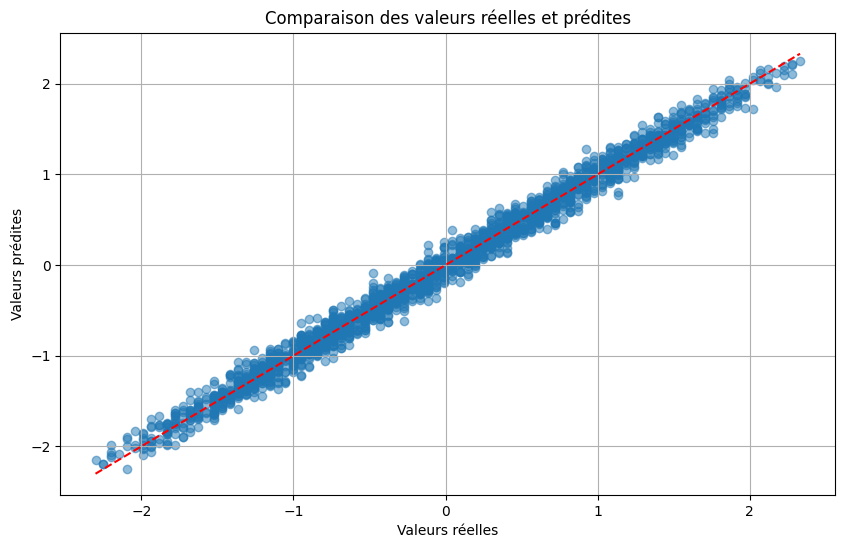

In [43]:
# Tracer un graphe comparant les valeurs réelles et les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # alpha pour la transparence des points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ligne de référence (y=x)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison des valeurs réelles et prédites")
plt.grid(True)
plt.show()

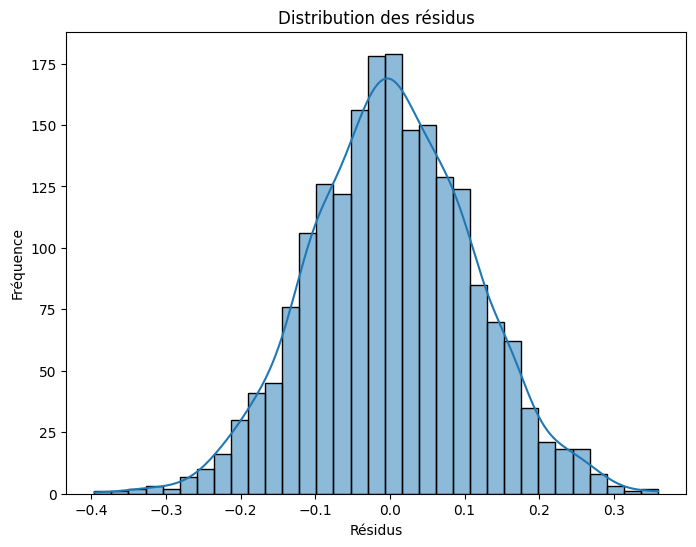

In [45]:
# Visualiser la distribution des résidus
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


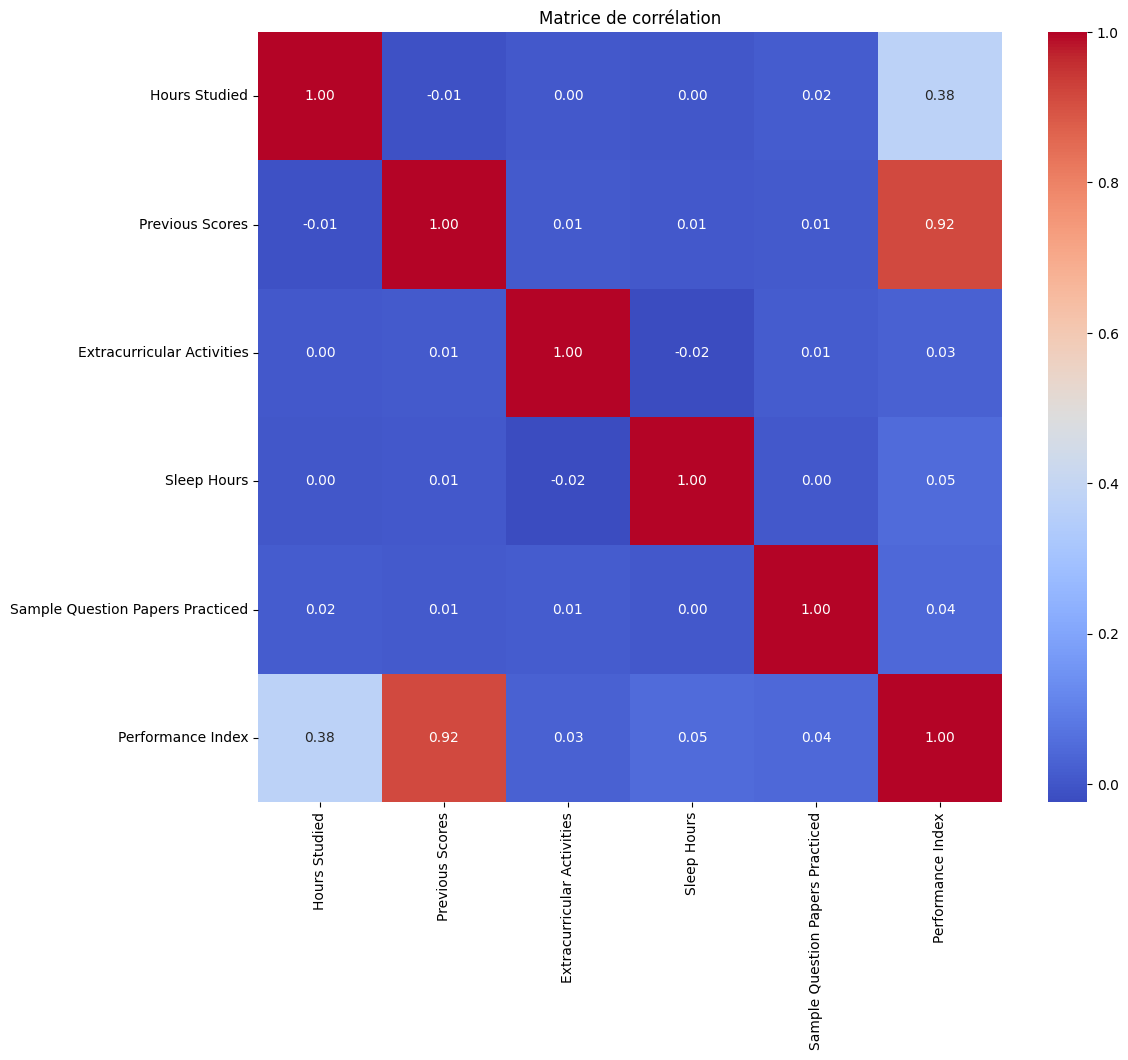

In [46]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(students.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


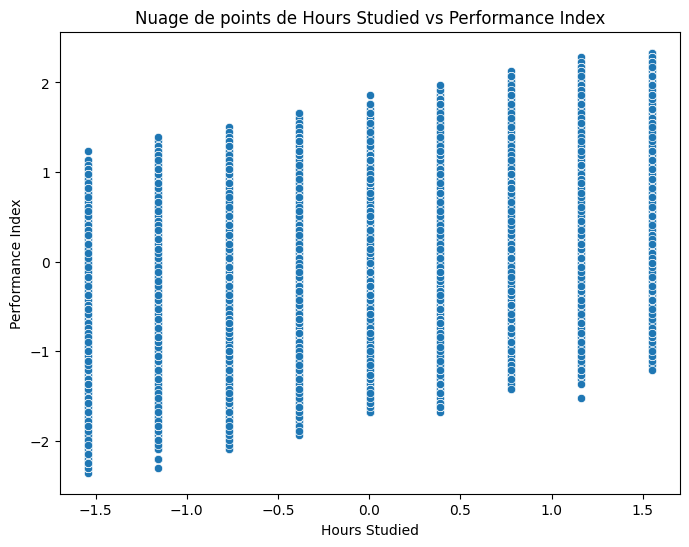

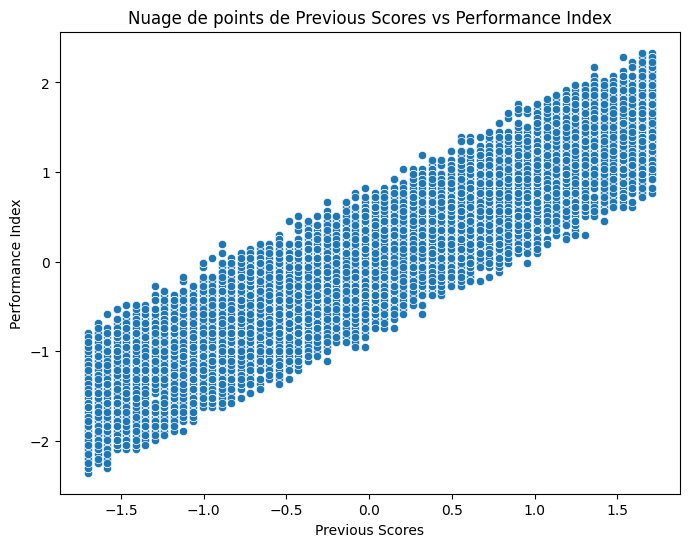

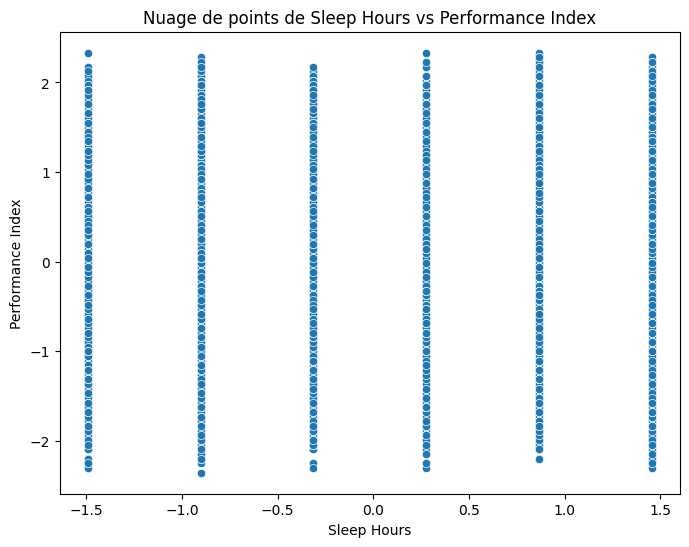

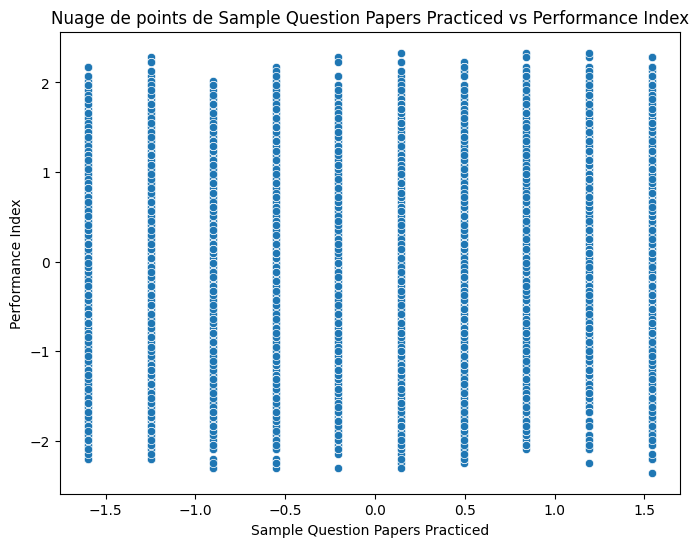

In [47]:
# Nuage de points entre les variables prédictives et la variable cible
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=col, y='Performance Index', data=students)
  plt.title(f'Nuage de points de {col} vs Performance Index')
  plt.xlabel(col)
  plt.ylabel('Performance Index')
  plt.show()

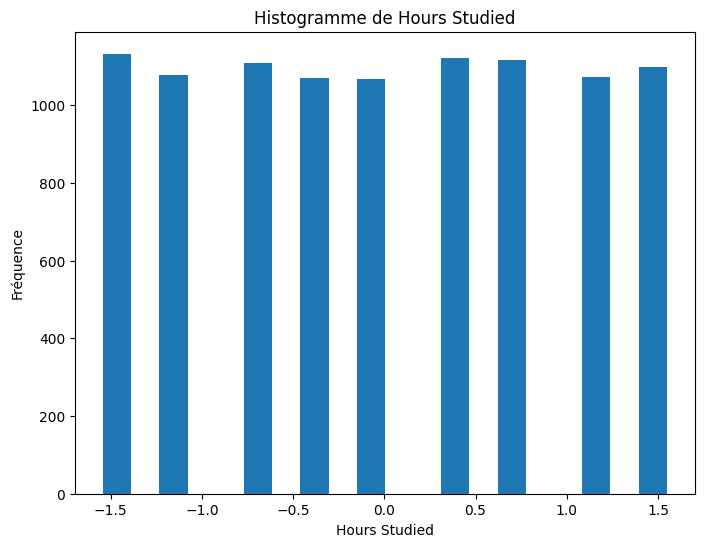

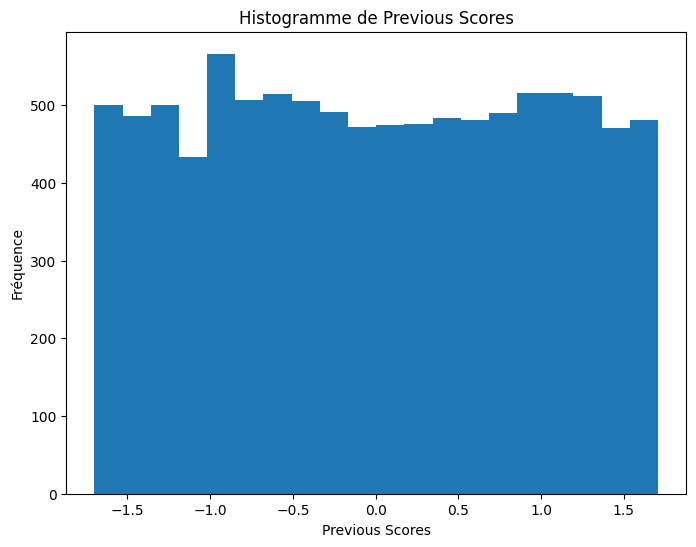

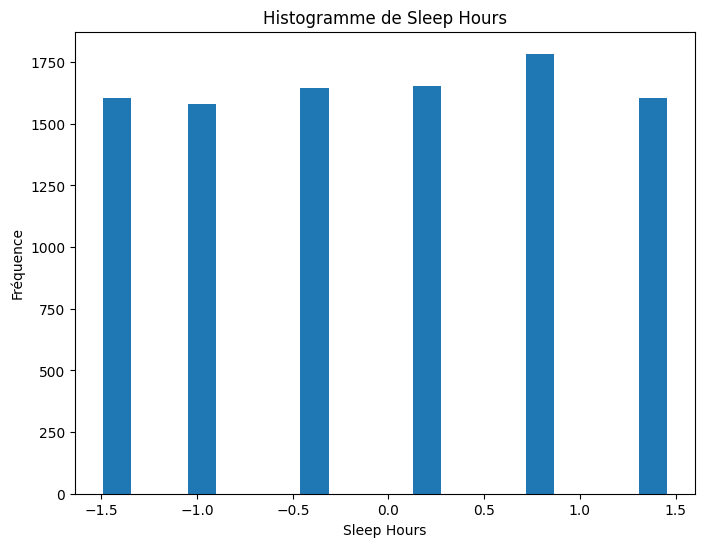

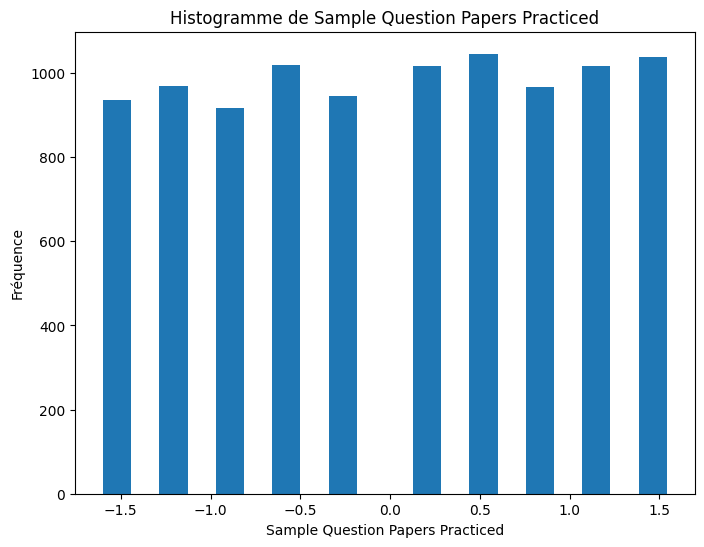

In [49]:
# Histogrammes entre les variables numériques
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(students[col], bins=20)  # Ajuster le nombre de bins si nécessaire
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()